In [1]:
autosave 5

Autosaving every 5 seconds


### Business problem

- Predicting popularity of songs based on attributes
- Use is for production companies to know the key attributes of popular songs in order to create new popular songs
- Steps
    - Load data
    - Explore/clean data
    - Visualize important aspects of data
    - Separate target variables from predicting variables
    - run models

### weekend

- use the weekend to think top down what i want to do with the project
- how to differentiate it
- using the api to get the same data and see how i can add to it


In [474]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [479]:
tracks = pd.read_csv('~/Desktop/data/tracks.csv')

In [480]:
tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [313]:
genres = pd.read_csv('./data/data_by_genres_o.csv')
genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [314]:
year = pd.read_csv('./data/data_by_year_o.csv')
year

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


In [315]:
artists = pd.read_csv('./data/artists.csv')
artists

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [316]:
data_by_artists = pd.read_csv('./data/data_by_artist_o.csv')
data_by_artists

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


### Data Understanding

Primary:

- id (Id of track generated by Spotify)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)

Dummy:

- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- timesignature (The predicted timesignature, most typically 4)
- artists (List of artists mentioned)
- artists (Ids of mentioned artists)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [317]:
tracks.drop(['id', 'name', 'id_artists'], axis=1, inplace=True)

In [318]:
tracks['release_date'] = pd.to_datetime(tracks['release_date'])

In [319]:
tracks['release_date'] = tracks['release_date'].dt.year

In [320]:
tracks

,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,126903,0,['Uli'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,0,98200,0,['Fernando Pessoa'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,0,181640,0,['Ignacio Corsini'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,0,176907,0,['Ignacio Corsini'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,50,258267,0,['阿YueYue'],2020,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,72,153293,0,['ROLE MODEL'],2020,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,70,187601,0,['FINNEAS'],2020,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,58,142003,0,"['Gentle Bones', 'Clara Benin']",2021,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [321]:
tracks.duplicated().sum()

2009

In [322]:
tracks.isna().sum()

popularity          0
duration_ms         0
explicit            0
artists             0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [323]:
tracks = tracks.drop_duplicates()

In [324]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584663 entries, 0 to 586671
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        584663 non-null  int64  
 1   duration_ms       584663 non-null  int64  
 2   explicit          584663 non-null  int64  
 3   artists           584663 non-null  object 
 4   release_date      584663 non-null  int64  
 5   danceability      584663 non-null  float64
 6   energy            584663 non-null  float64
 7   key               584663 non-null  int64  
 8   loudness          584663 non-null  float64
 9   mode              584663 non-null  int64  
 10  speechiness       584663 non-null  float64
 11  acousticness      584663 non-null  float64
 12  instrumentalness  584663 non-null  float64
 13  liveness          584663 non-null  float64
 14  valence           584663 non-null  float64
 15  tempo             584663 non-null  float64
 16  time_signature    58

In [325]:
x_num = tracks.drop('artists', axis=1)

KeyboardInterrupt: 

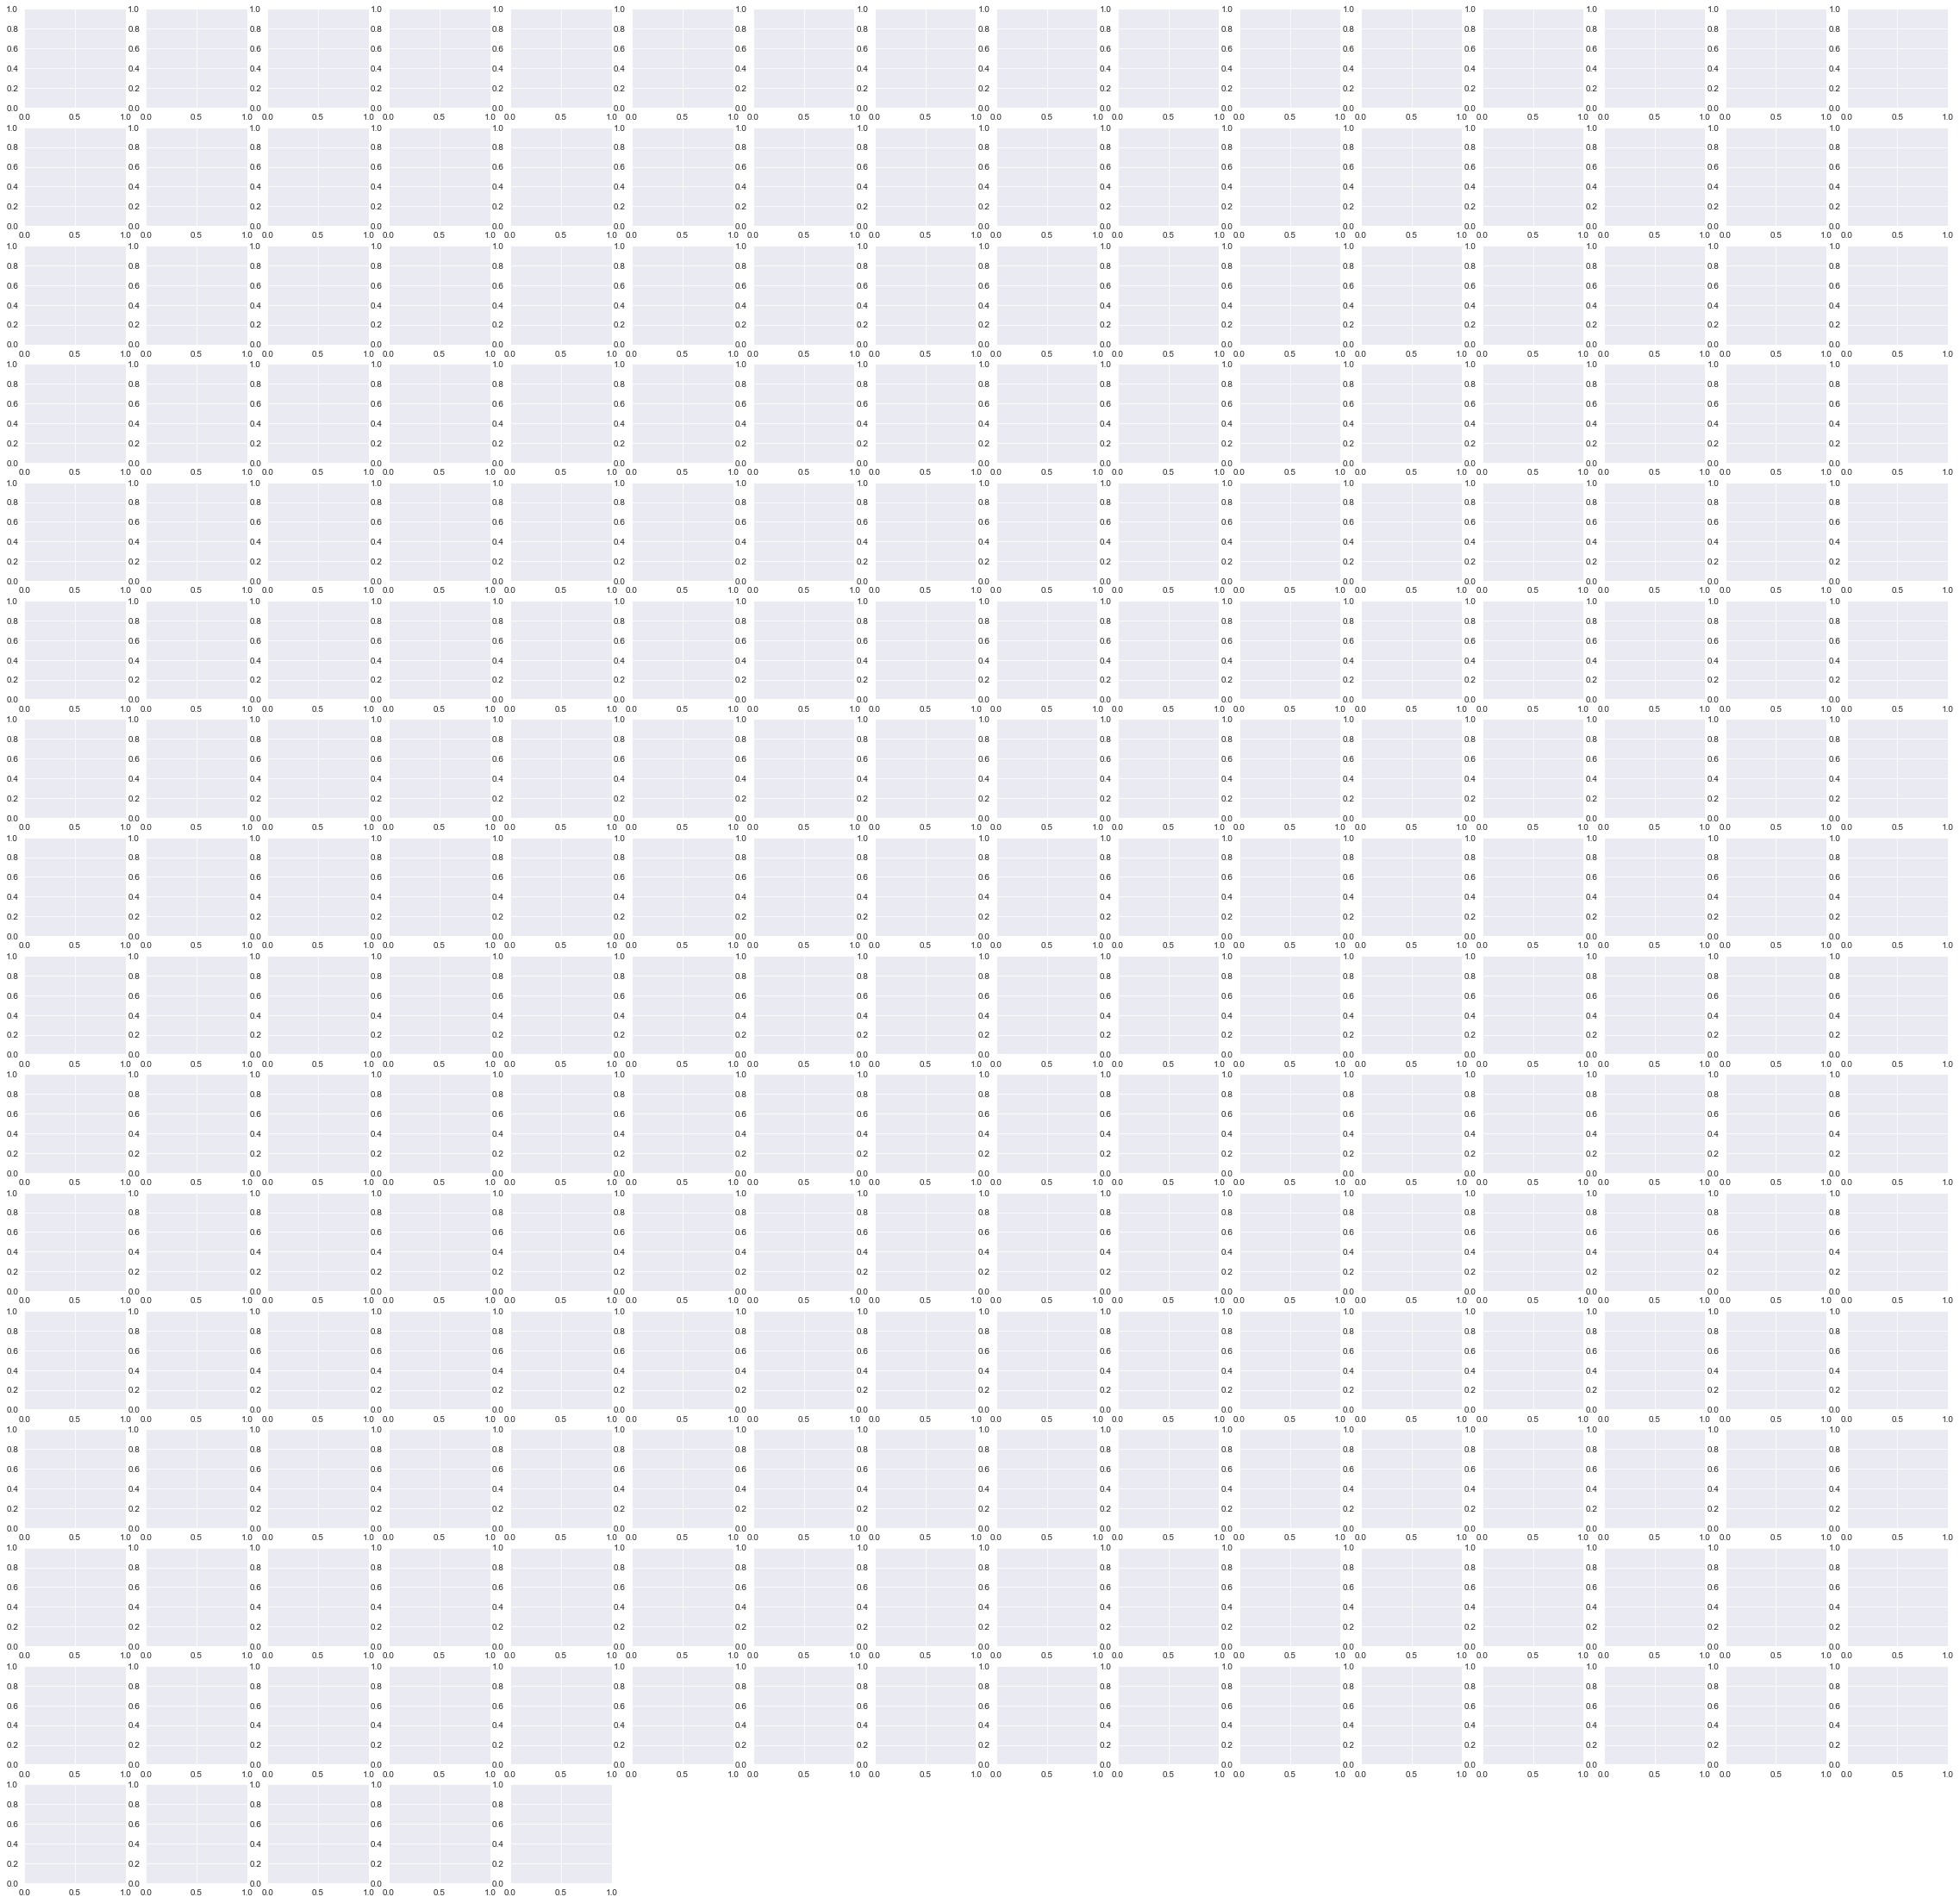

In [326]:
sns.pairplot(x_num.sample(10000))

In [365]:
pop_corr = abs(tracks.corr()[['popularity']]).sort_values('popularity', ascending=False)
pop_corr

,popularity
popularity,1.000000
acousticness,0.370882
loudness,0.327028
energy,0.302315
instrumentalness,0.236487
explicit,0.211758
danceability,0.187000
time_signature,0.086759
tempo,0.071364
liveness,0.048740


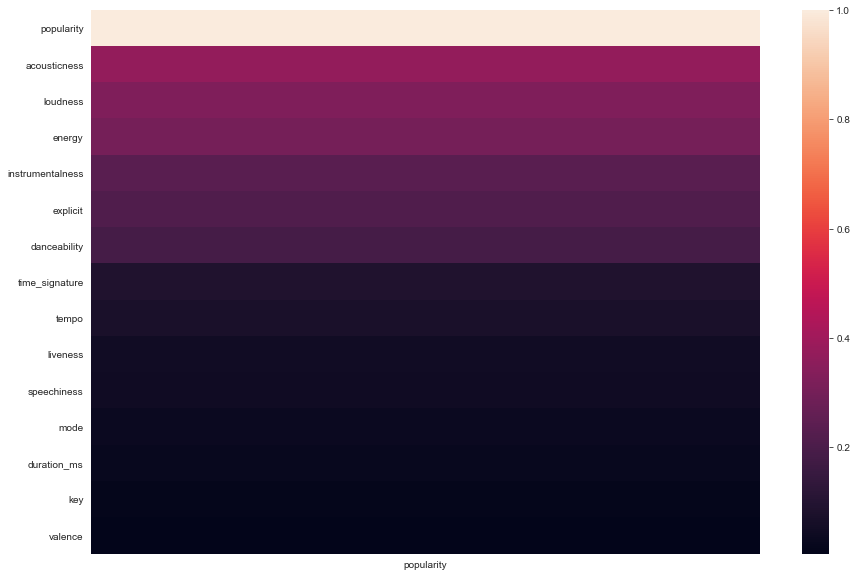

In [366]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pop_corr, ax=ax);

In [367]:
corr = abs(tracks.corr())
corr

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.027681,0.211758,0.187000,0.302315,0.015299,0.327028,0.033655,0.047357,0.370882,0.236487,0.048740,0.004643,0.071364,0.086759
duration_ms,0.027681,1.000000,0.016747,0.120371,0.024825,0.004626,0.000337,0.027610,0.125771,0.064434,0.069278,0.002137,0.163202,0.001210,0.037552
explicit,0.211758,0.016747,1.000000,0.150229,0.123076,0.010932,0.134603,0.051754,0.102258,0.149018,0.067520,0.013114,0.016539,0.005745,0.044447
danceability,0.187000,0.120371,0.150229,1.000000,0.241563,0.018824,0.251436,0.044719,0.199310,0.242951,0.225900,0.106168,0.528150,0.040783,0.146196
energy,0.302315,0.024825,0.123076,0.241563,1.000000,0.036294,0.764735,0.065246,0.053506,0.715412,0.195839,0.124632,0.372276,0.230099,0.188983
key,0.015299,0.004626,0.010932,0.018824,0.036294,1.000000,0.027109,0.129491,0.001035,0.027414,0.006776,0.006774,0.019992,0.004904,0.008928
loudness,0.327028,0.000337,0.134603,0.251436,0.764735,0.027109,1.000000,0.040464,0.167112,0.519423,0.329306,0.029529,0.275448,0.189288,0.164377
mode,0.033655,0.027610,0.051754,0.044719,0.065246,0.129491,0.040464,1.000000,0.017992,0.058918,0.010008,0.007009,0.011474,0.007871,0.015892
speechiness,0.047357,0.125771,0.102258,0.199310,0.053506,0.001035,0.167112,0.017992,1.000000,0.069060,0.102440,0.207047,0.046501,0.086911,0.114171
acousticness,0.370882,0.064434,0.149018,0.242951,0.715412,0.027414,0.519423,0.058918,0.069060,1.000000,0.204412,0.004738,0.180939,0.195235,0.173927


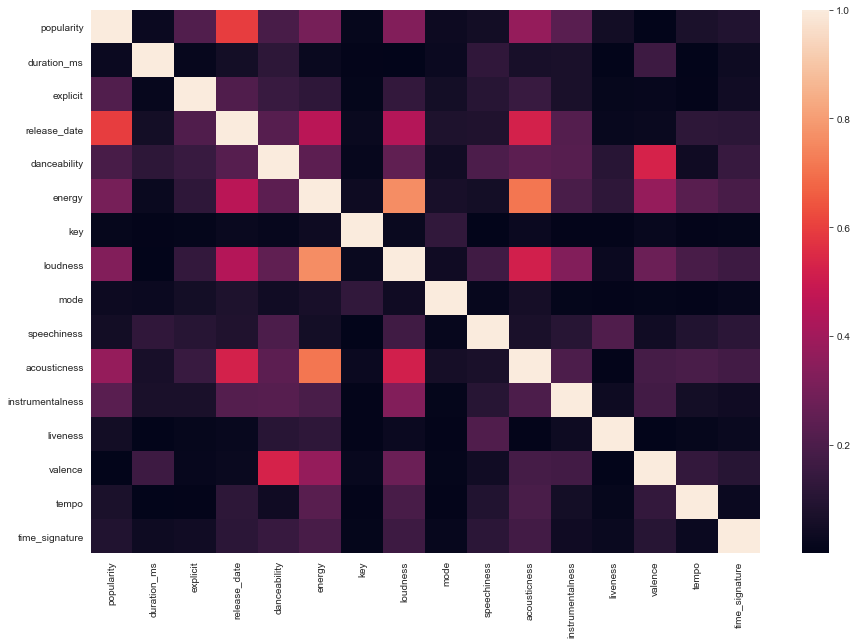

In [330]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax);

#### Exploring artists

In [331]:
unique_artists = tracks['artists'].nunique()

In [332]:
print(f'Unique artists: {unique_artists}')

Unique artists: 114030


In [368]:
artist_pop = tracks.groupby('artists')['popularity'].sum().sort_values(ascending=False)
top_25 = artist_pop[:25]

In [369]:
top_25

artists
['Die drei ???']                              140705
['TKKG Retro-Archiv']                          58554
['Bibi Blocksberg']                            50096
['Benjamin Blümchen']                          42371
['Bibi und Tina']                              32037
['Queen']                                      29458
['Fünf Freunde']                               22190
['Taylor Swift']                               21802
['Elvis Presley']                              21779
['Pink Floyd']                                 21762
['The Rolling Stones']                         20985
['The Beatles']                                20129
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']     19653
['Fleetwood Mac']                              18163
['Frank Sinatra']                              17152
['Julio Iglesias']                             16939
['Metallica']                                  16688
['Luis Miguel']                                15802
['BTS']                               

Text(0, 0.5, 'sum popularity')

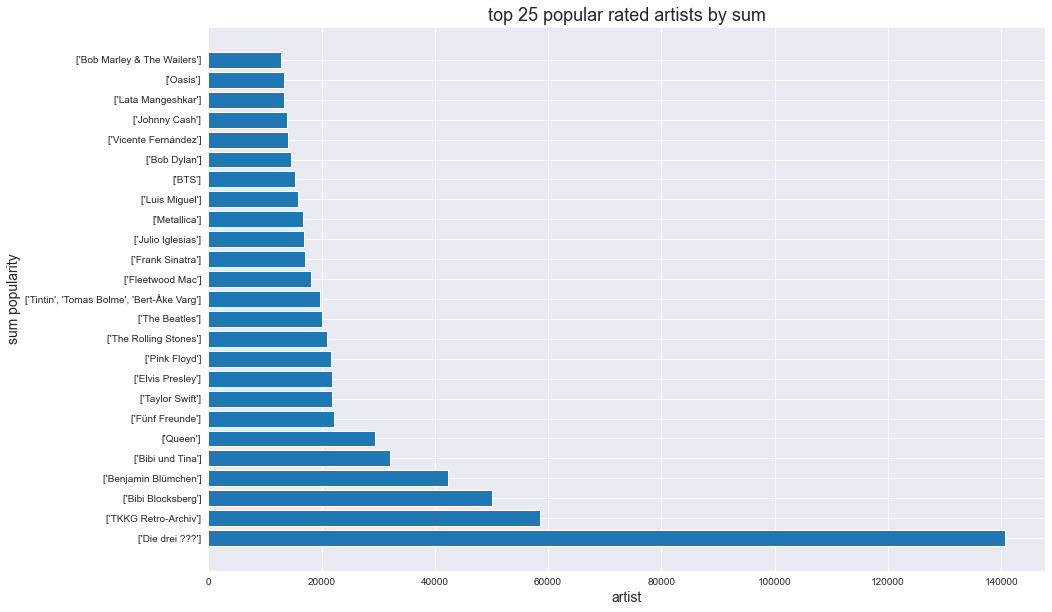

In [370]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(top_25.index, top_25.values)
ax.set_title('top 25 popular rated artists by sum', fontsize=18)
ax.set_xlabel('artist', fontsize=14)
ax.set_ylabel('sum popularity', fontsize=14)

In [371]:
tracks['pop_artists_100songs'] = tracks['artists'].map(tracks['artists'].value_counts() > 100)

In [372]:
tracks.shape

(586672, 21)

In [373]:
pop_artists = tracks[tracks['pop_artists_100songs']== True]

In [374]:
pop_artists['pop_artists_100songs'].value_counts()

True    115502
Name: pop_artists_100songs, dtype: int64

In [375]:
pop_artists

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_artists_100songs
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994000,0.021800,0.2120,0.457,130.418,5,True
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995000,0.918000,0.1040,0.397,169.980,3,True
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,...,-23.228,1,0.1530,0.996000,0.933000,0.1480,0.612,75.595,3,True
19,0l3BQsVJ7F76wlN5QhJzaP,El Vendaval - Remasterizado,0,153533,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.370,0.3720,...,-17.138,1,0.0865,0.985000,0.000681,0.9290,0.753,159.669,4,True
22,0xJCJ9XSNcdTIz0QKmhtEn,La Maleva - Remasterizado,0,181440,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.339,0.0958,...,-26.944,1,0.0530,0.994000,0.969000,0.1230,0.219,86.279,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586521,6HJBcPvhKBIGzPWFQzIqkd,算什麼男人,35,289480,0,['Jay Chou'],['2elBjNSdBE2Y3f0j1mjrql'],2014-12-19,0.523,0.5720,...,-6.834,1,0.0274,0.356000,0.000001,0.1210,0.306,106.943,4,True
586580,2XXXk54soacKXmnUYUbMKE,In Control,49,307520,0,['Hillsong Worship'],['3SgHzT552wy2W8pNLaLk24'],2016-10-14,0.408,0.5190,...,-8.732,1,0.0311,0.106000,0.000000,0.9600,0.212,141.883,4,True
586608,2aZupO4LLmoOvxQLU9kOwe,A State Of Trance (ASOT 894) - A State Of Tran...,1,40680,0,['Armin van Buuren'],['0SfsnGyD8FpIN4U4WCkBZ5'],2018-12-13,0.572,0.6660,...,-10.493,0,0.3080,0.137000,0.000000,0.5640,0.957,129.118,3,True
586619,0OjUKNY3JHVlsvsVYkn5te,Turn It Up (FYHYM2019),1,41739,0,['Armin van Buuren'],['0SfsnGyD8FpIN4U4WCkBZ5'],2020-01-05,0.597,0.9530,...,-7.136,1,0.1240,0.000151,0.249000,0.6840,0.184,138.006,4,True


In [376]:
top_pop_artists = pop_artists.groupby('artists')['popularity'].mean().sort_values(ascending=False)

In [377]:
top_pop_artists

artists
['Drake']                                                 62.689320
['Taylor Swift']                                          60.729805
['Arctic Monkeys']                                        60.028037
['BTS']                                                   59.482625
['Eminem']                                                58.302817
                                                            ...    
['Janusz Korczak']                                         0.000000
['Radclyffe Hall', 'Alice White', 'Synthesized Voice']     0.000000
['Arthur Conan Doyle']                                     0.000000
['Юрий Тынянов']                                           0.000000
['Franz Joseph Haydn', 'Pro Arte Quartet']                 0.000000
Name: popularity, Length: 562, dtype: float64

In [378]:
top_25_artists = top_pop_artists[:25]
top_25_artists

artists
['Drake']                                                     62.689320
['Taylor Swift']                                              60.729805
['Arctic Monkeys']                                            60.028037
['BTS']                                                       59.482625
['Eminem']                                                    58.302817
['Lana Del Rey']                                              58.127660
['Ed Sheeran']                                                56.628571
['Linkin Park']                                               55.884298
['PNL']                                                       55.831683
['Jorge & Mateus']                                            52.468750
['Rammstein']                                                 51.451389
['Red Hot Chili Peppers']                                     50.698225
['Jack Johnson']                                              50.596491
['Green Day']                                           

Text(0, 0.5, 'mean popularity')

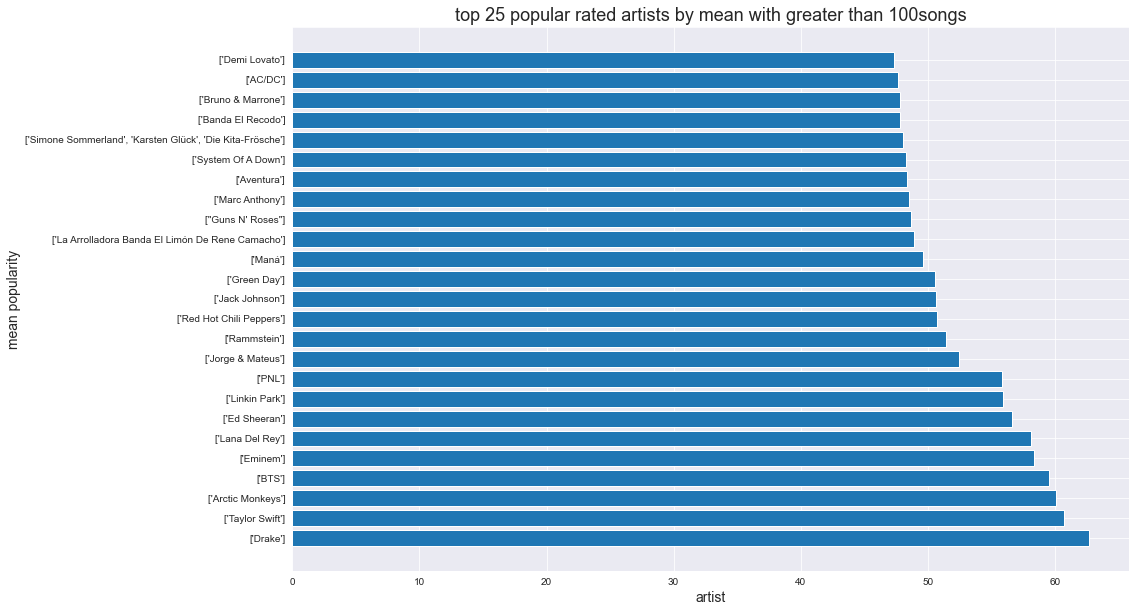

In [379]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(top_25_artists.index, top_25_artists.values)
ax.set_title('top 25 popular rated artists by mean with greater than 100songs', fontsize=18)
ax.set_xlabel('artist', fontsize=14)
ax.set_ylabel('mean popularity', fontsize=14)

In [392]:
tracks['mean'] = tracks.groupby('artists')['popularity'].transform('mean')

In [394]:
tracks['count'] = tracks.groupby('artists')['popularity'].transform('count')

C:\Users\Erin Vu\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

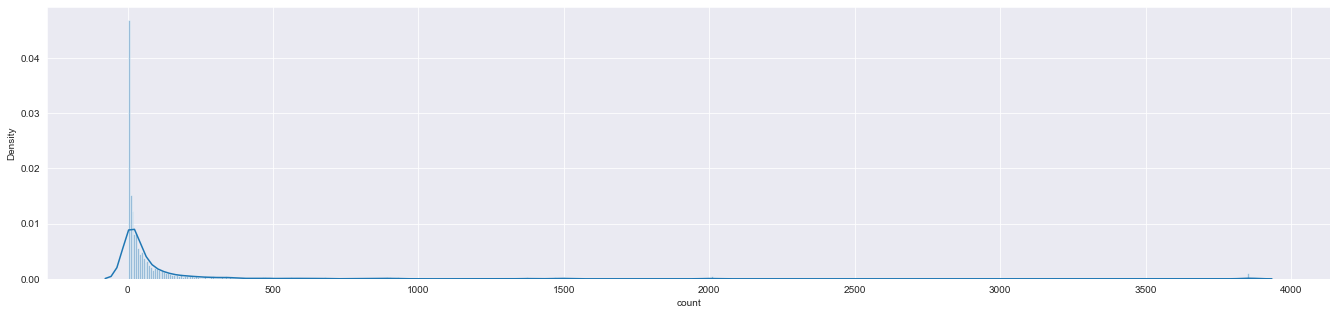

In [404]:
fig, ax = plt.subplots(figsize=(23,5))
sns.distplot(tracks['count'], bins = 600, ax=ax)

C:\Users\Erin Vu\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

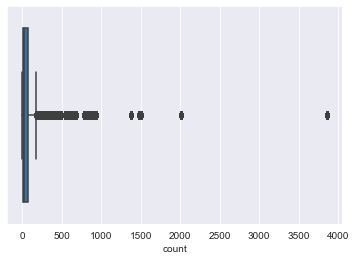

In [396]:
sns.boxplot(tracks['count'])

C:\Users\Erin Vu\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

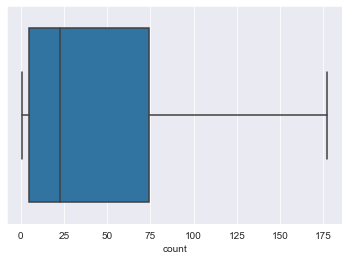

In [397]:
sns.boxplot(tracks['count'], showfliers=False)

In [403]:
multiple = tracks[['artists', 'mean']].loc[tracks['count']>900].value_counts(ascending=False).reset_index()
multiple

,artists,mean,0
0,['Die drei ???'],36.489886,3856
1,['TKKG Retro-Archiv'],29.189432,2006
2,['Benjamin Blümchen'],28.190951,1503
3,['Bibi Blocksberg'],34.032609,1472
4,['Lata Mangeshkar'],9.751639,1373
5,['Bibi und Tina'],34.559871,927
6,"['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']",21.716022,905


In [406]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    586672 non-null  object 
 1   name                  586601 non-null  object 
 2   popularity            586672 non-null  int64  
 3   duration_ms           586672 non-null  int64  
 4   explicit              586672 non-null  int64  
 5   artists               586672 non-null  object 
 6   id_artists            586672 non-null  object 
 7   release_date          586672 non-null  object 
 8   danceability          586672 non-null  float64
 9   energy                586672 non-null  float64
 10  key                   586672 non-null  int64  
 11  loudness              586672 non-null  float64
 12  mode                  586672 non-null  int64  
 13  speechiness           586672 non-null  float64
 14  acousticness          586672 non-null  float64
 15  

#### duration

C:\Users\Erin Vu\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

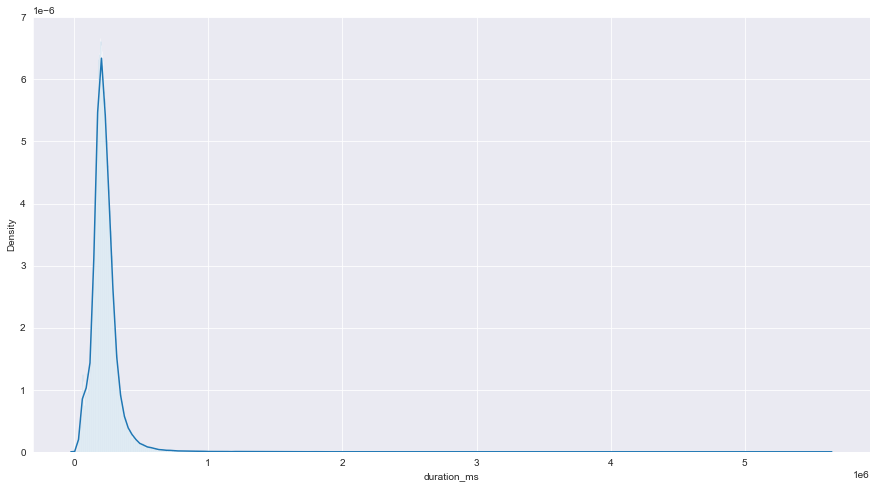

In [420]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(tracks['duration_ms'], bins='auto', ax=ax)

In [452]:
tracks['popularity'].corr(tracks['duration_ms'])

0.02768066604880647

#### Explicit

In [447]:
corr_explicit = tracks['popularity'].corr(tracks['explicit'])

In [448]:
print(f'Correlation to popularity is {corr_explicit}')

Correlation to popularity is 0.21175812868911537


In [439]:
explicit=tracks['explicit']
y_explicit = ['no explicit', 'explicit']

C:\Users\Erin Vu\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Explicit vs No Explicit')

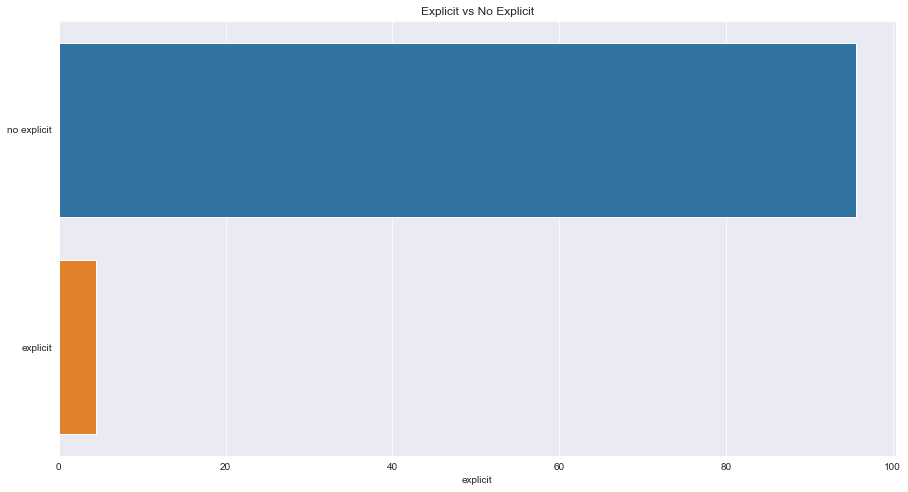

In [441]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(explicit.value_counts(normalize=True)*100,y=y_explicit, data=tracks, ax=ax)
ax.set_title('Explicit vs No Explicit')

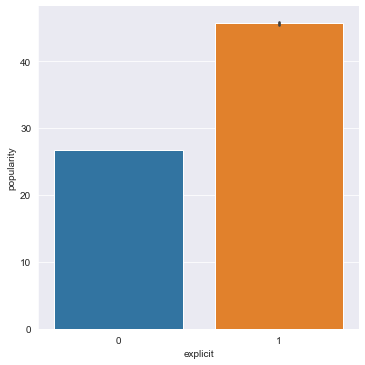

In [458]:
sns.catplot(data=tracks, kind='bar', x='explicit', y='popularity')

Above we can see that the majority of the values for explicit are not explicit and the correlation is 0.21. 

#### key

In [463]:
tracks['popularity'].corr(tracks['key'])

0.01529866653395943

C:\Users\Erin Vu\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


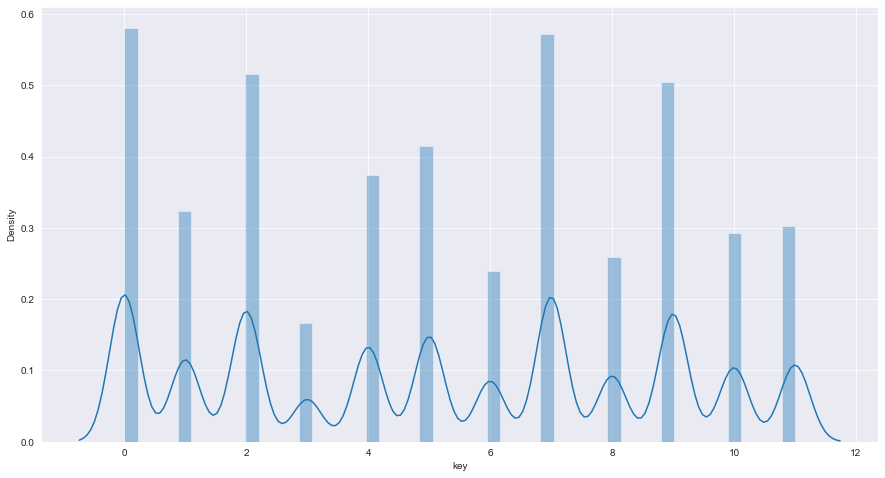

In [459]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(tracks['key'], ax=ax);

In [461]:
tracks['key'].value_counts(normalize=True)

0     0.127755
7     0.125759
2     0.113440
9     0.111013
5     0.091387
4     0.082192
1     0.071140
11    0.066702
10    0.064278
8     0.057034
6     0.052595
3     0.036707
Name: key, dtype: float64

### FSM

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [241]:
X = tracks[['acousticness']]
y = tracks['popularity']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [243]:
lr = LinearRegression()

In [244]:
lr.fit(X_train, y_train)

LinearRegression()

In [246]:
lr.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 1,
 'coef_': array([-19.58769811]),
 '_residues': 127170089.4359058,
 'rank_': 1,
 'singular_': array([230.80959736]),
 'intercept_': 36.44999882920285}

In [251]:
base_preds = lr.predict(X_test)

In [252]:
mean_squared_error(y_test, base_preds)

288.99736577429076

#### OHE

In [464]:
from sklearn.preprocessing import OneHotEncoder

In [465]:
X = tracks.drop(['popularity', 'pop_artists_100songs'], axis=1)
y = tracks['popularity']

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [467]:
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore')

In [468]:
X_train

,id,name,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mean,count
260446,7hdwn19gmxqVfU3HyBNi4c,Johanka Z Parku,205453,0,['Nerez'],['3QaXn2KULl2cdtD1a0vPpG'],1990,0.881,0.362,0,...,1,0.4840,0.697000,0.000000,0.1170,0.860,139.307,4,14.878788,33
15135,0ho4JHJOQ9Pu1qGbZe690F,Jenny,196800,0,['Danny Kaye'],['4r6DXcqtllstKwEx3ndKMj'],1941,0.677,0.192,5,...,0,0.2430,0.904000,0.000003,0.4950,0.658,125.401,4,8.378378,37
166248,7lqKsyQBBaNwWDjCcAzbBX,Kasakkapartio,225700,0,['Frederik'],['3bLCTs7b0rXgPLsuRq1Wlh'],1983,0.662,0.867,0,...,0,0.0454,0.398000,0.011700,0.2740,0.861,132.933,4,18.460000,50
526624,3ByMvvnehSzT54MMqLUKas,Mellaga Mellaga-Female,387744,0,['K. S. Chithra'],['2IUtwMti1OiT3lkW6RubgH'],2002-12-03,0.773,0.546,2,...,1,0.0259,0.749000,0.000253,0.1280,0.629,108.074,4,30.344828,58
38809,10EeysK2xPjkUT7DxPAKFG,Shake And Fingerpop,163533,0,['Jr. Walker & The All Stars'],['1rHh0AI30JhKrbzKIFjFNd'],1965-01-01,0.678,0.744,5,...,0,0.0445,0.072400,0.000000,0.0620,0.961,122.297,4,35.400000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337976,55FYnuvROAef5K0iqYUU7w,Between Twenty-Nine and Danger,187960,0,['Tammy Wynette'],['1LFKKuzn302wp15dYH28id'],1964,0.667,0.309,8,...,1,0.0326,0.295000,0.000003,0.1100,0.507,88.178,4,21.757895,95
369532,6UDHRiuIc0KB3lp7SAazOE,Ben Ağlamazken,242880,0,['Ceza'],['28Qbi9jTj2eej21P2mImZI'],2004-07-01,0.785,0.758,2,...,1,0.2130,0.340000,0.000000,0.1360,0.708,175.997,4,40.106383,47
327700,4qf5rU2zJXTLIh2VdjiIgJ,ไม่สายเกินไป,227173,0,['Ter Rewat'],['0edoXHzI1rCbDSkMj8xYWz'],1986-07-01,0.890,0.503,9,...,0,0.0392,0.333000,0.002380,0.0286,0.963,134.534,4,14.703704,27
57324,4peMUbevRAvsj1psIWlDL8,Happy Station,434773,0,['Fun Fun'],['44NpcgfV0tBVBVNzmtUBhZ'],1983-03-12,0.759,0.739,10,...,1,0.0415,0.043400,0.680000,0.5080,0.953,119.644,4,37.200000,5


In [469]:
train_artists = X_train[['artists']]

In [470]:
train_artists_ohe = ohe.fit(train_artists)

In [471]:
train_artists_ohe.categories_

[array(['["\'Om\' Alec Khaoli & Umoja"]',
        '["\'T Hof Van Commerce", \'TLP\']', '["\'T Hof Van Commerce"]',
        ..., "['지선']", "['지수']", "['최진희']"], dtype=object)]

In [472]:
train_artists_ohe = train_artists_ohe.transform(train_artists)

In [473]:
train_artists_ohe = pd.DataFrame(train_artists_ohe, columns = ohe.categories_, index=X_train.index)

ValueError: Shape of passed values is (440004, 1), indices imply (440004, 96222)

In [307]:
train_artists_ohe

<438497x96120 sparse matrix of type '<class 'numpy.float64'>'
	with 438497 stored elements in Compressed Sparse Row format>

In [ ]:
X = tracks.drop('popularity', axis=1)
y = tracks['popularity']